In [28]:
%run util.py

# Undamped Pendulum

ODE under consideration is

$$
\theta'' + \sin \theta = 0
$$

Let's set $\theta' = v$ and therefore we have

$$
v' + \sin \theta = 0 \rightarrow v' = - \sin \theta
$$

Used convention:

$$
\theta = X[0], v = X[1]
$$

In [3]:
def dX_dt(X, t=0):
    return np.array([X[1],
                     -np.sin(X[0])      ])

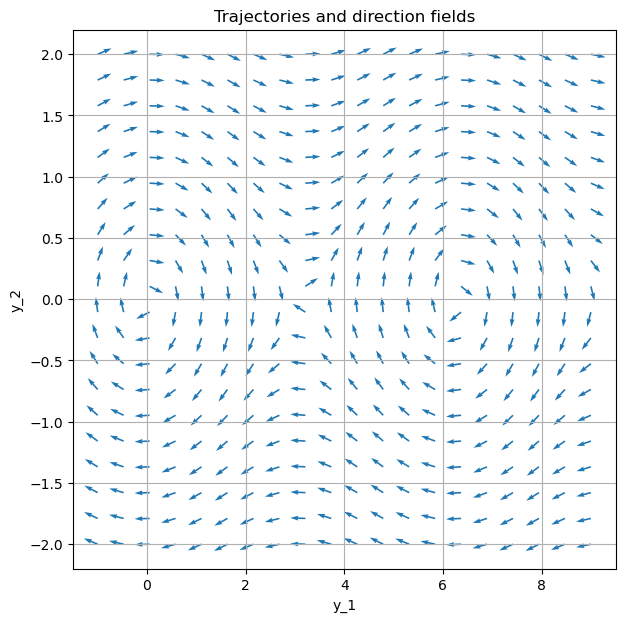

In [29]:
vField(-1, 9, -2, 2, dX_dt, Norm = True)

In [24]:
tmax = 20
X, infodict = solveODE(dX_dt, [0., 2.2], 0, tmax)
infodict['message']

'Integration successful.'

Text(0, 0.5, '$\theta, v$')

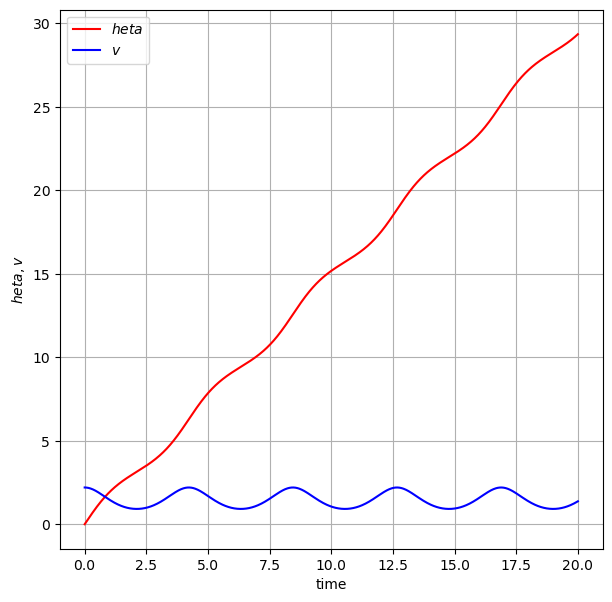

In [25]:
t  = np.linspace(0, tmax, 1000)
y1, y2 = X.T

plt.plot(t, y1, 'r-', label='$\theta$')
plt.plot(t, y2  , 'b-', label='$v$')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('$\theta, v$')

# Damped Pendulum

ODE under consideration is

$$
\theta'' + b \\theta' + \sin \theta = 0
$$

Let's set $\theta' = v$ and therefore we have

$$
v' + b v + \sin \theta = 0 \rightarrow v' = - \sin \theta - bv
$$


In [53]:
b = 0.2

In [54]:
def dX_dt(X, t=0):
    return np.array([X[1],
                     -np.sin(X[0]) - b*X[1]     ])

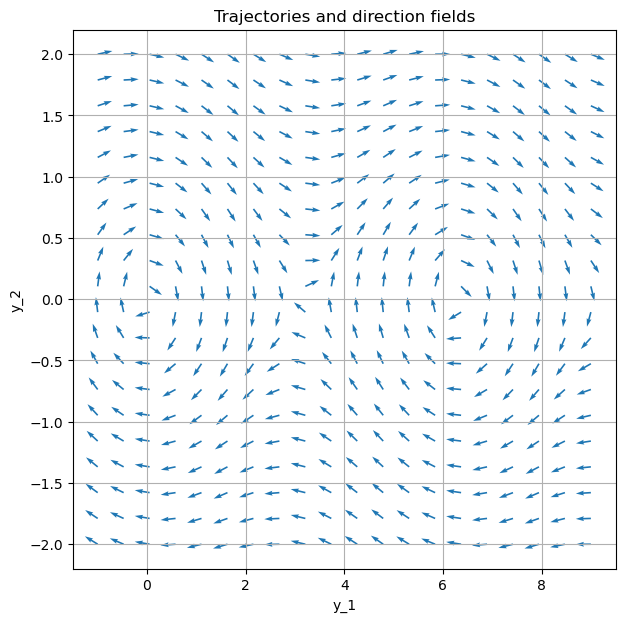

In [55]:
vField(-1, 9, -2, 2, dX_dt, Norm = True)

In [56]:
tmax = 50
X, infodict = solveODE(dX_dt, [0., 2.2], 0, tmax)
infodict['message']

'Integration successful.'

Text(0, 0.5, '$\theta, v$')

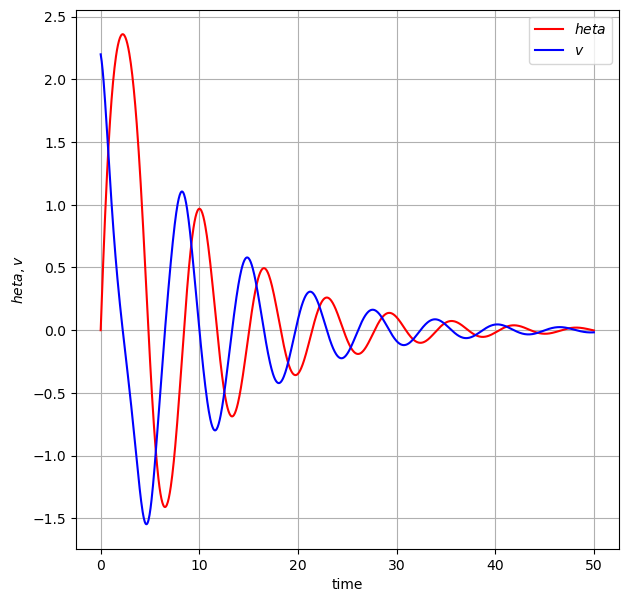

In [57]:
t  = np.linspace(0, tmax, 1000)
y1, y2 = X.T

plt.plot(t, y1, 'r-', label='$\theta$')
plt.plot(t, y2  , 'b-', label='$v$')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('$\theta, v$')